univariate analysis  
numerical: box plot, dist plot, hist plot  
catergory: count plot  

multivariate analysis


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('metrics_per_salesterritory.csv')

In [64]:
# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Set 'OrderDate' as the index
df.set_index('OrderDate', inplace=True)

In [65]:
df['TerritoryID'] = df['TerritoryID'].astype('category')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5832 entries, 2011-05-31 to 2014-06-30
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   TerritoryID               5832 non-null   category
 1   SalesAmount               5832 non-null   float64 
 2   Average Profit Margin     5832 non-null   float64 
 3   OrderQty                  5832 non-null   float64 
 4   UnitPrice                 5832 non-null   float64 
 5   UnitPriceDiscount         5832 non-null   float64 
 6   TaxAmt                    5832 non-null   float64 
 7   Freight                   5832 non-null   float64 
 8   Average_Revenue_Per_User  5832 non-null   float64 
dtypes: category(1), float64(8)
memory usage: 416.1 KB


### label TerritoryID

In [67]:
territory_mapping = {
    1: "Northwest, US",
    2: "Northeast, US",
    3: "Central, US",
    4: "Southwest, US",
    5: "Southeast, US",
    6: "Canada",
    7: "France",
    8: "Germany",
    9: "Australia",
    10: " United Kingdom" 
}

df['TerritoryName'] = df['TerritoryID'].map(territory_mapping)

df.insert(1, 'TerritoryName', df.pop('TerritoryName'))

In [68]:
df.head()

,TerritoryID,TerritoryName,SalesAmount,Average Profit Margin,OrderQty,UnitPrice,UnitPriceDiscount,TaxAmt,Freight,Average_Revenue_Per_User
OrderDate,,,,,,,,,,
2011-05-31,1,"Northwest, US",97305.5951,437.498446,96.0,48231.2437,0.0,7784.447608,2432.639873,13900.799300
2011-05-31,2,"Northeast, US",13846.9397,-128.293004,35.0,12131.5067,0.0,1107.755176,346.173489,3461.734925
2011-05-31,3,"Central, US",19243.0643,174.893383,40.0,13886.5012,0.0,1539.445144,481.076606,4810.766075
2011-05-31,4,"Southwest, US",69758.1839,-4072.209214,209.0,23173.7255,0.0,5580.654712,1743.954593,9965.454843
2011-05-31,5,"Southeast, US",125376.6509,529.687827,126.0,60322.7235,0.0,10030.132072,3134.416266,13930.738989


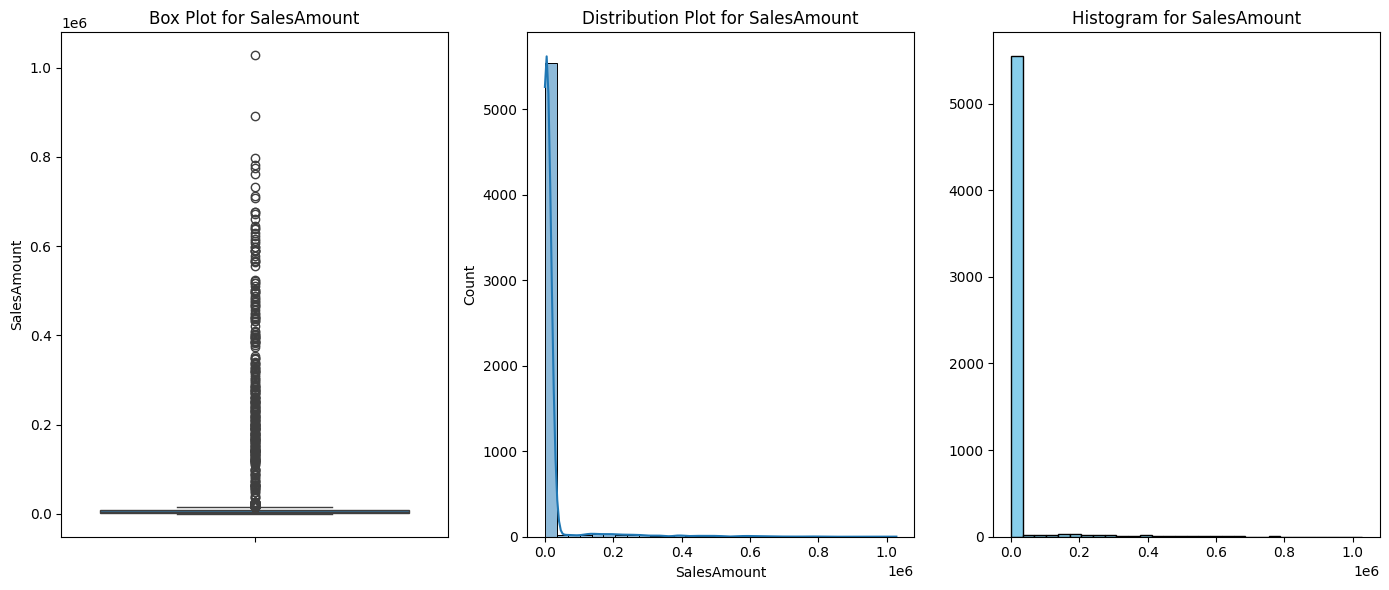

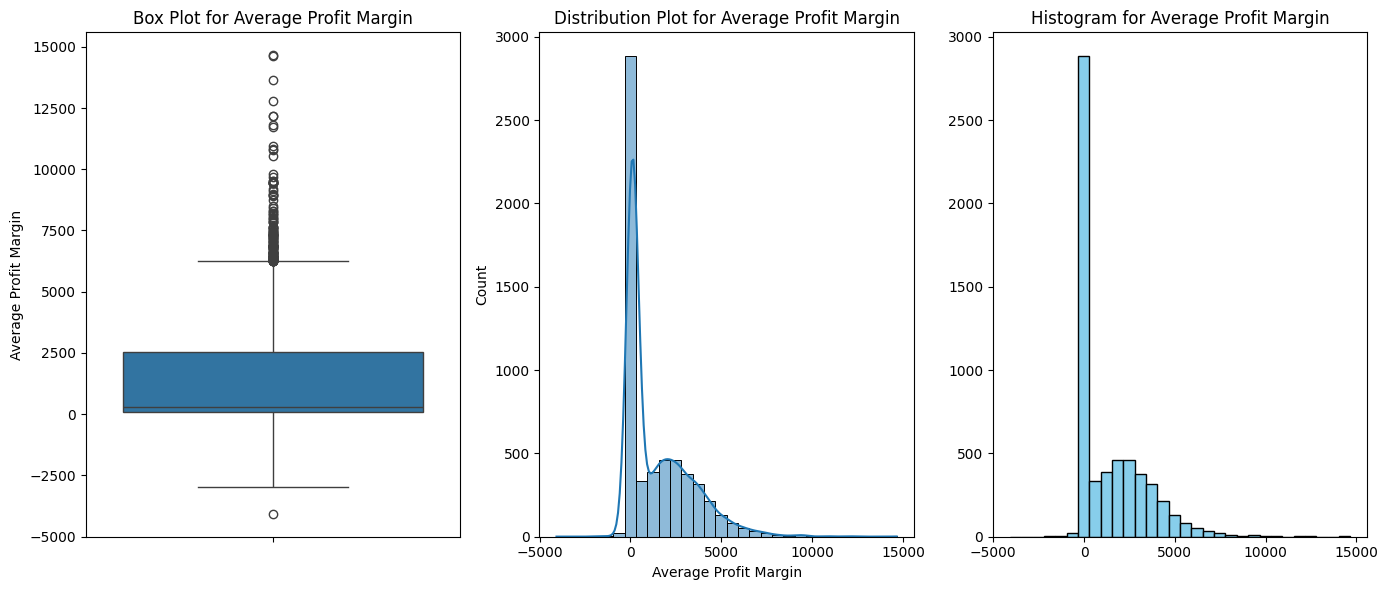

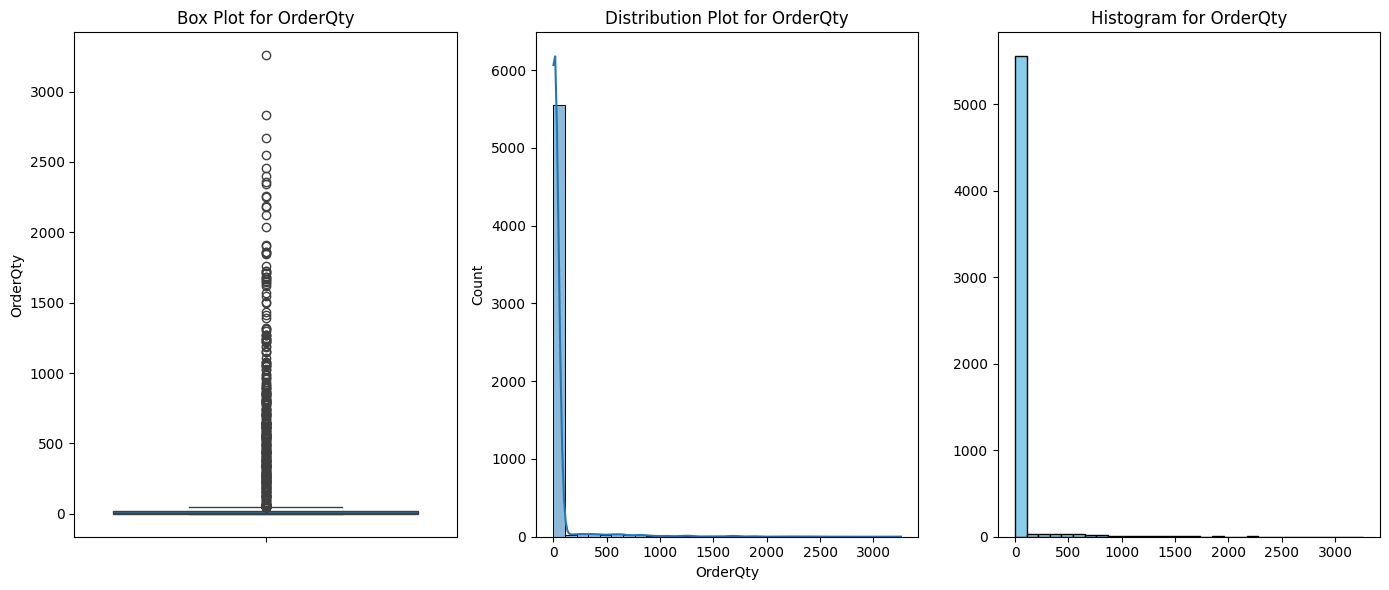

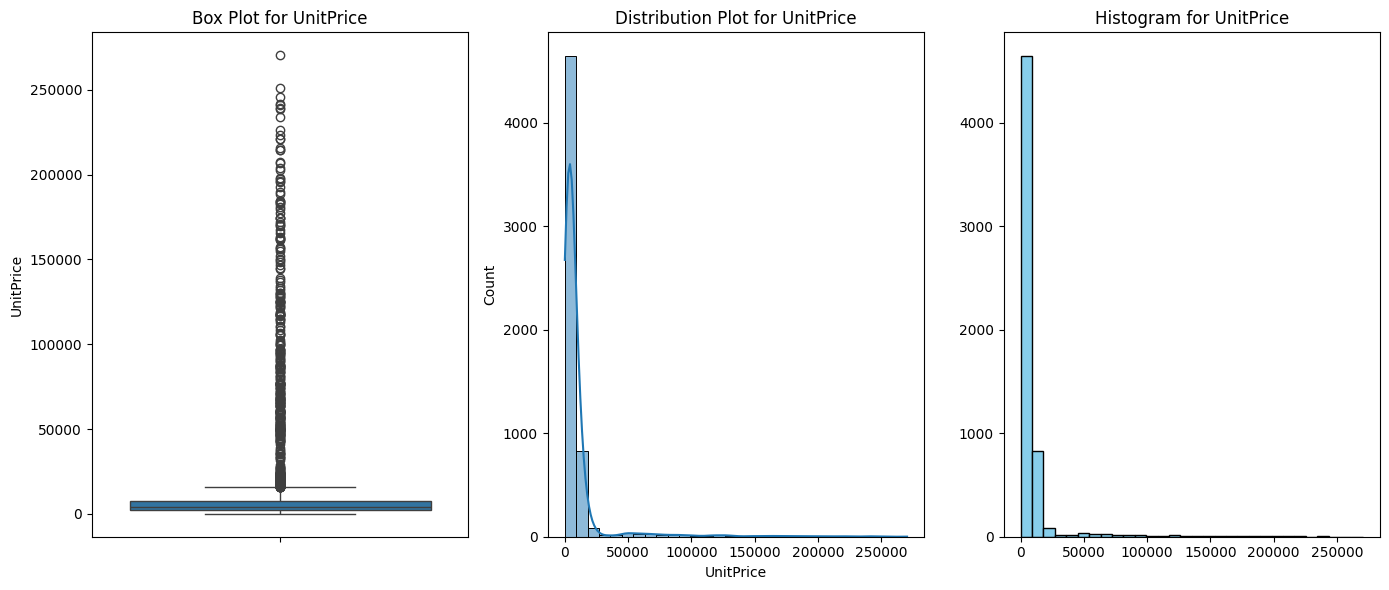

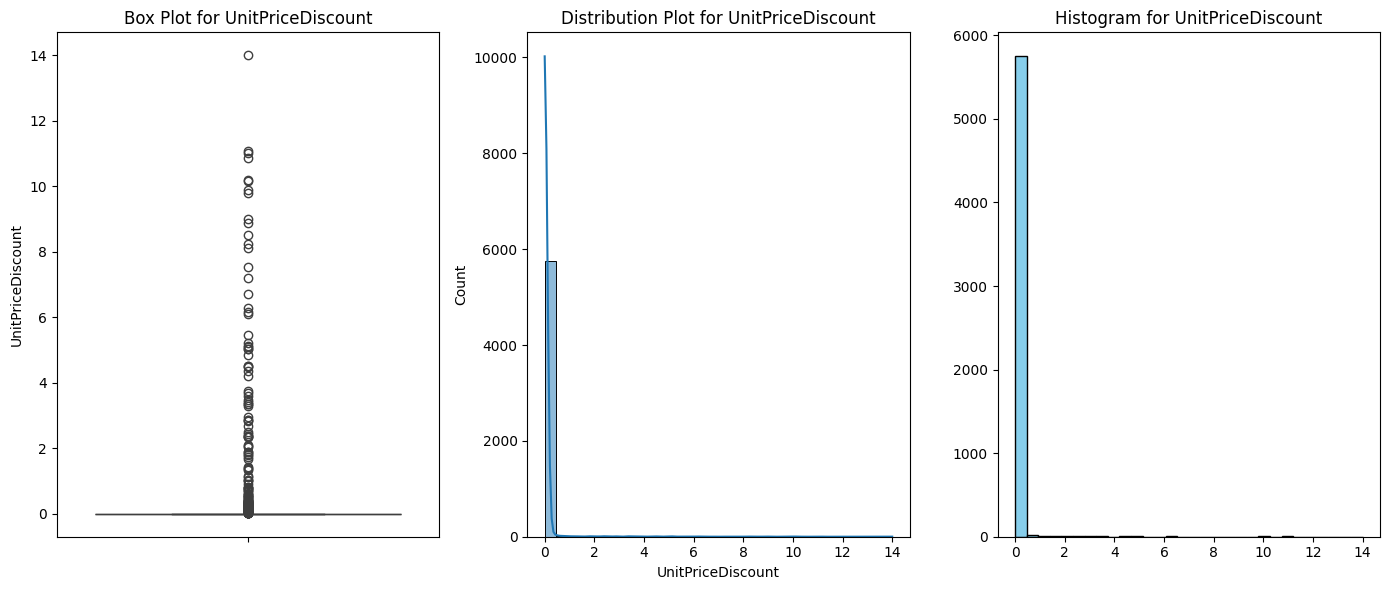

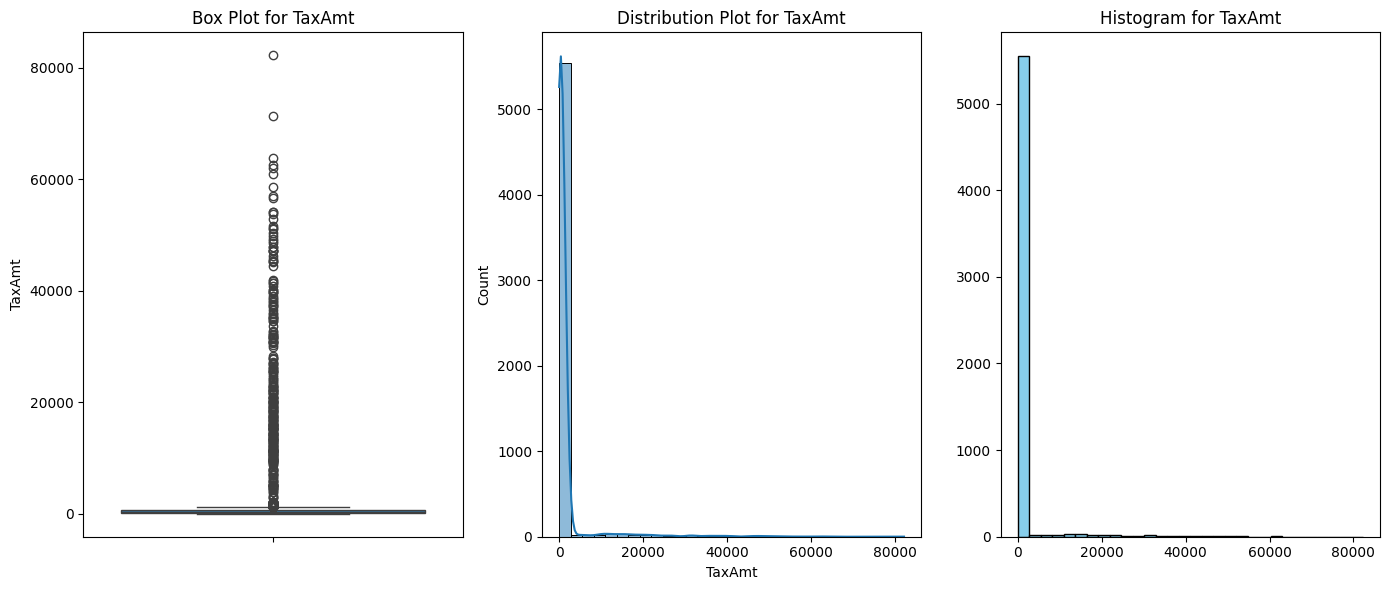

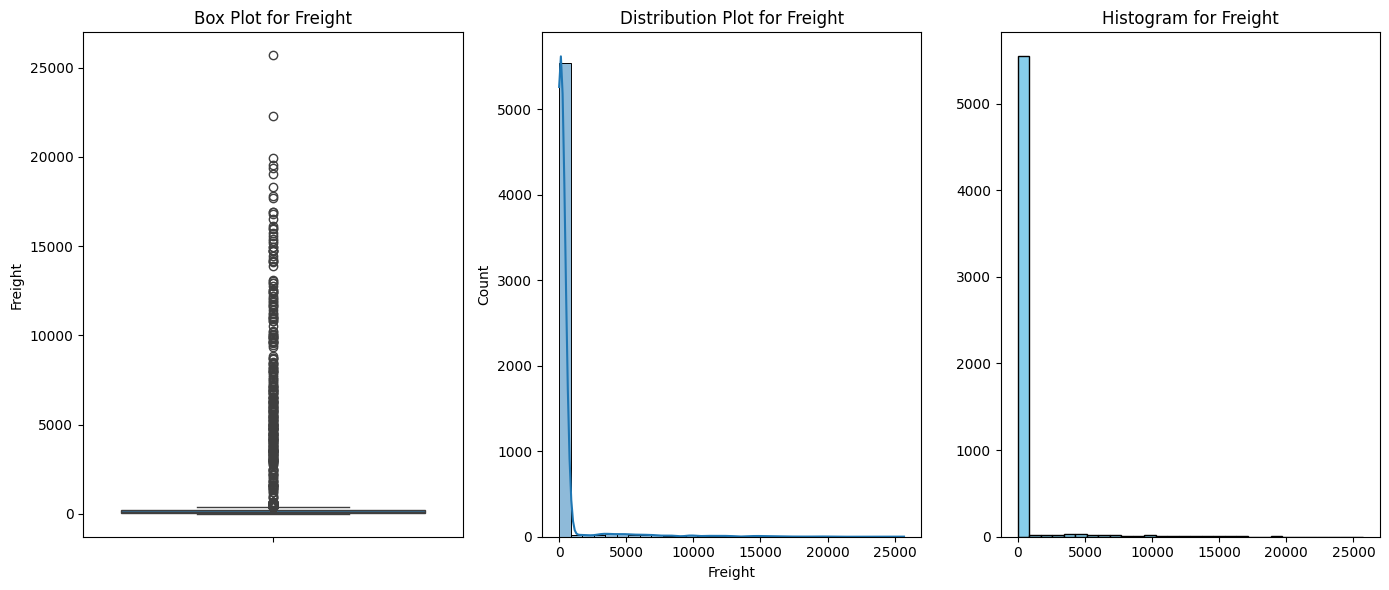

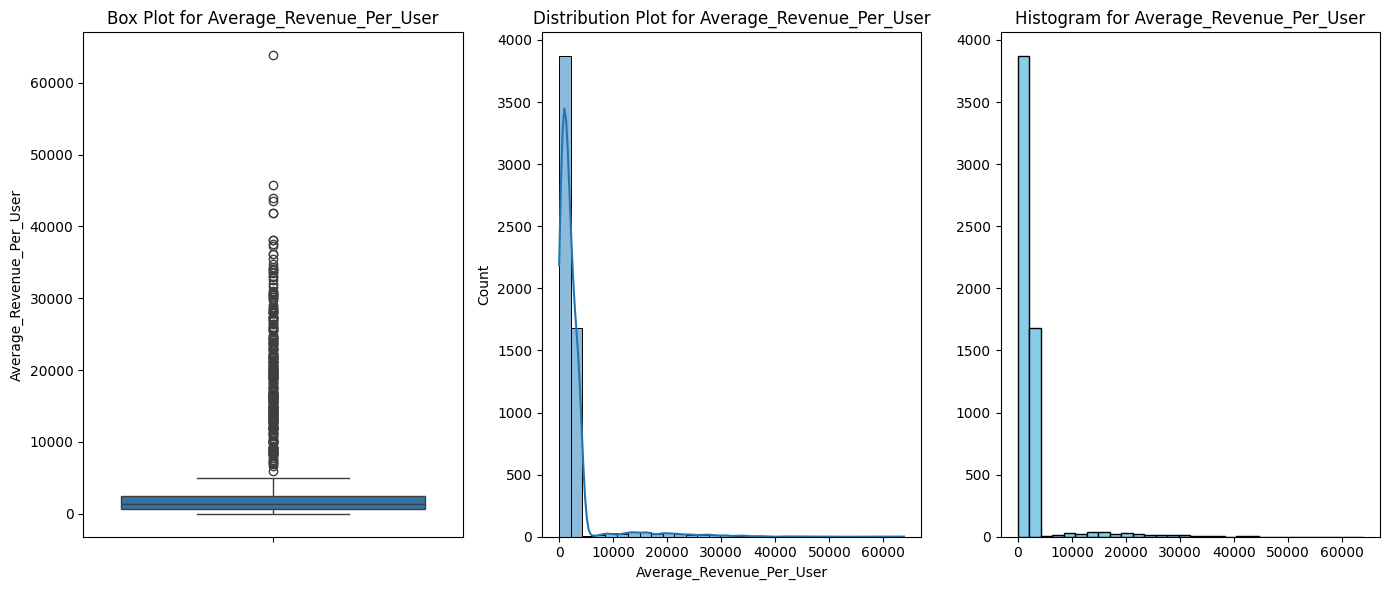

In [69]:
# Assume FactSales is your DataFrame
numeric_cols = df.select_dtypes(include='number').columns  # Select only numeric columns

# Create a directory of plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    
    # Box Plot
    plt.subplot(1, 3, 1)  # Create subplot (1 row, 3 columns, 1st plot)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    
    # Dist Plot
    plt.subplot(1, 3, 2)  # Create subplot (1 row, 3 columns, 2nd plot)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution Plot for {col}')
    
    # Hist Plot
    plt.subplot(1, 3, 3)  # Create subplot (1 row, 3 columns, 3rd plot)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

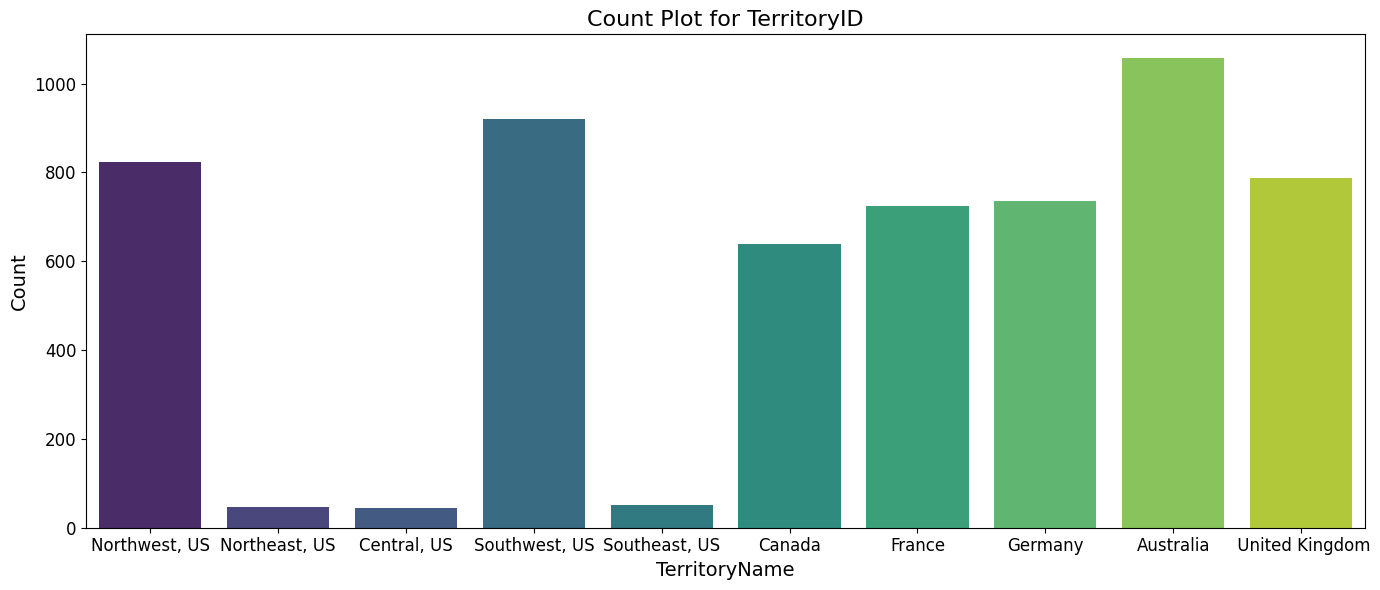

In [70]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='TerritoryName', hue='TerritoryName', palette='viridis', legend=False)

# Customize the plot
plt.title('Count Plot for TerritoryID', fontsize=16)
plt.xlabel('TerritoryName', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

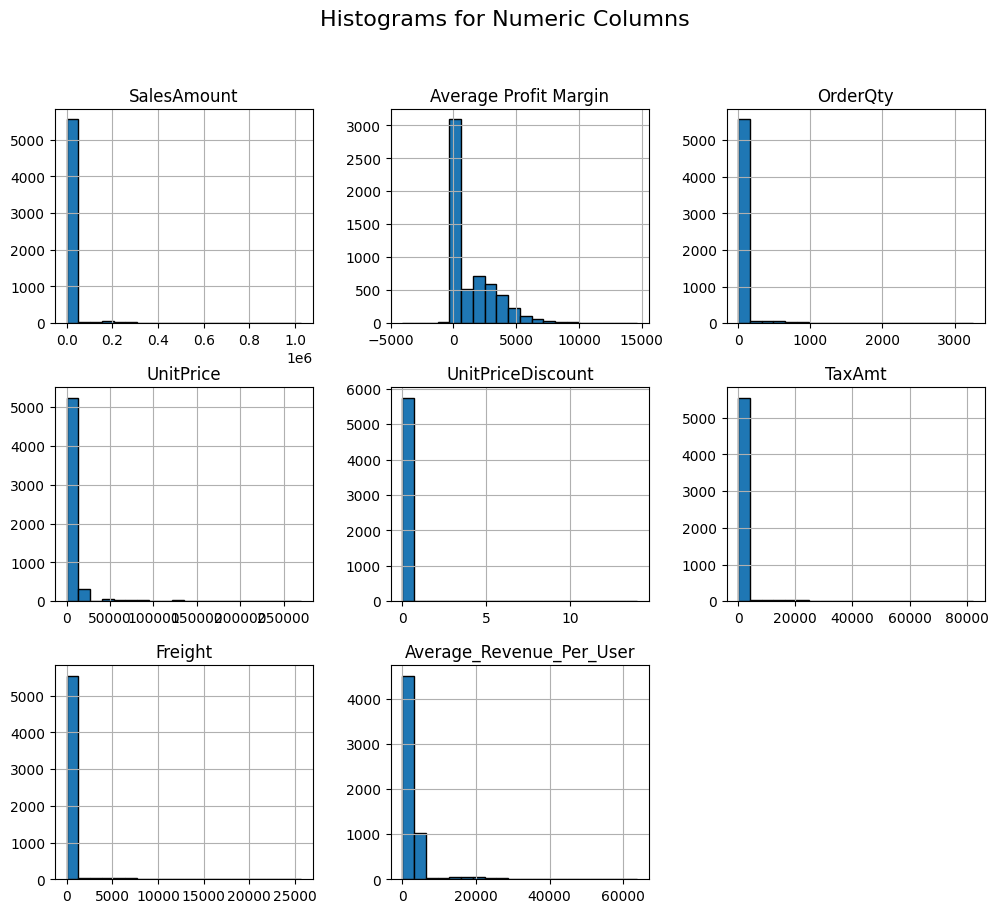

In [71]:
# Histograms for all numeric columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numeric Columns", fontsize=16)
plt.show()


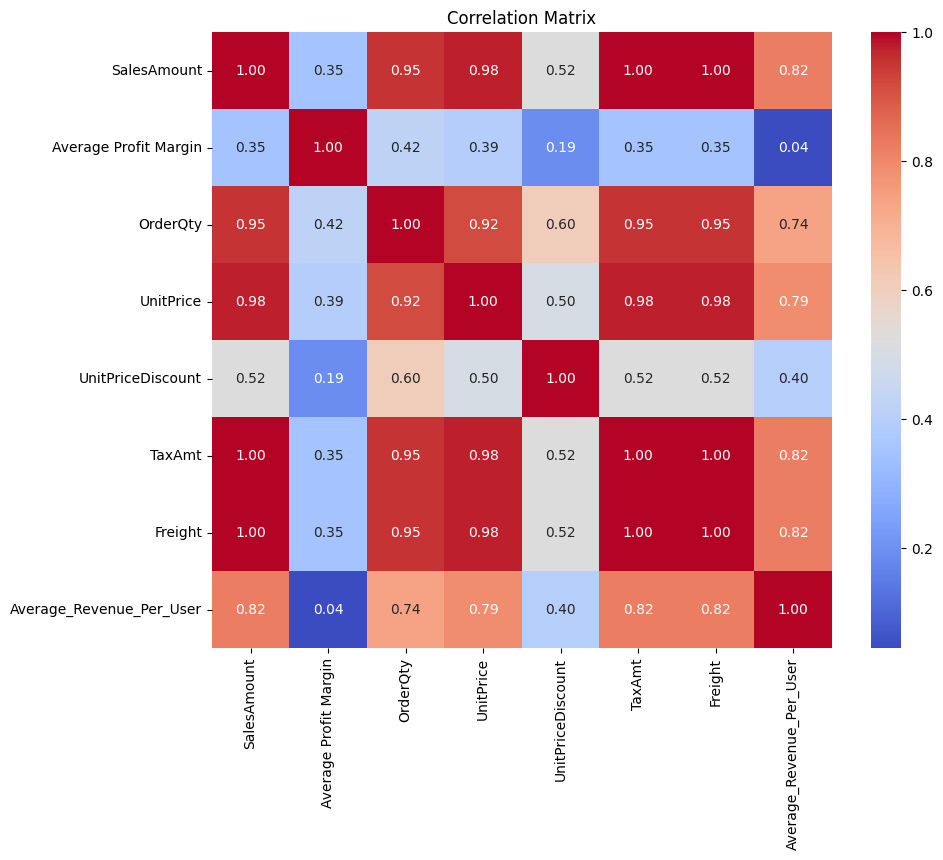

In [72]:
import numpy as np

# Correlation matrix and heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.02, 'Pairwise Scatter Plots')

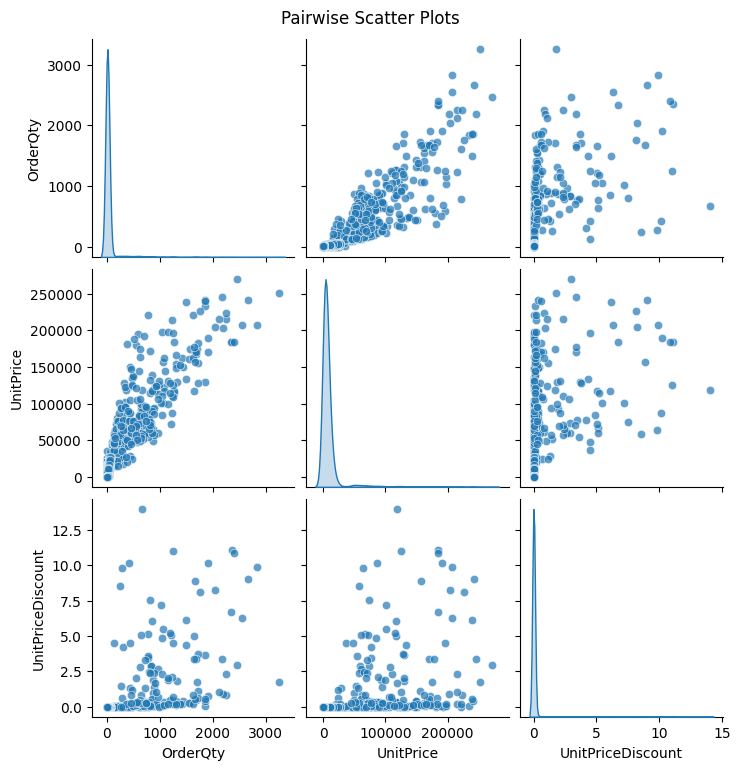

In [82]:
selected_features = ['OrderQty', 'UnitPrice', 'UnitPriceDiscount']

sns.pairplot(df[selected_features], diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.7})

plt.suptitle("Pairwise Scatter Plots", y=1.02)

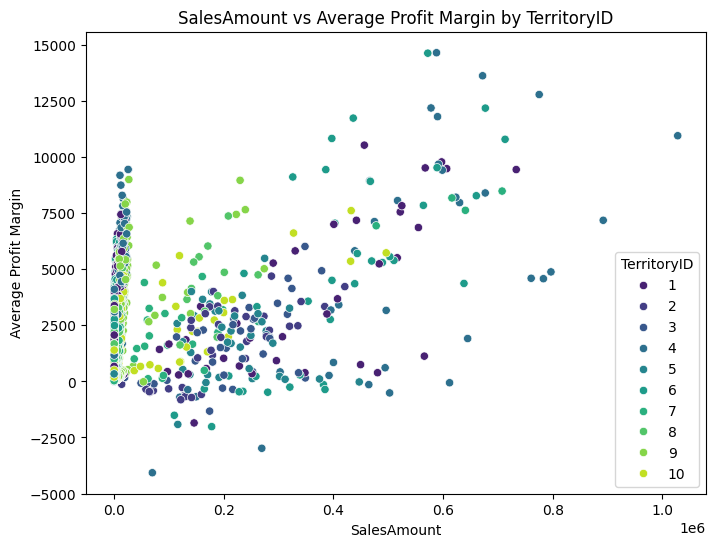

In [73]:
# Scatter plot: SalesAmount vs Average Profit Margin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SalesAmount', y='Average Profit Margin', hue='TerritoryID', palette='viridis')
plt.title('SalesAmount vs Average Profit Margin by TerritoryID')
plt.show()


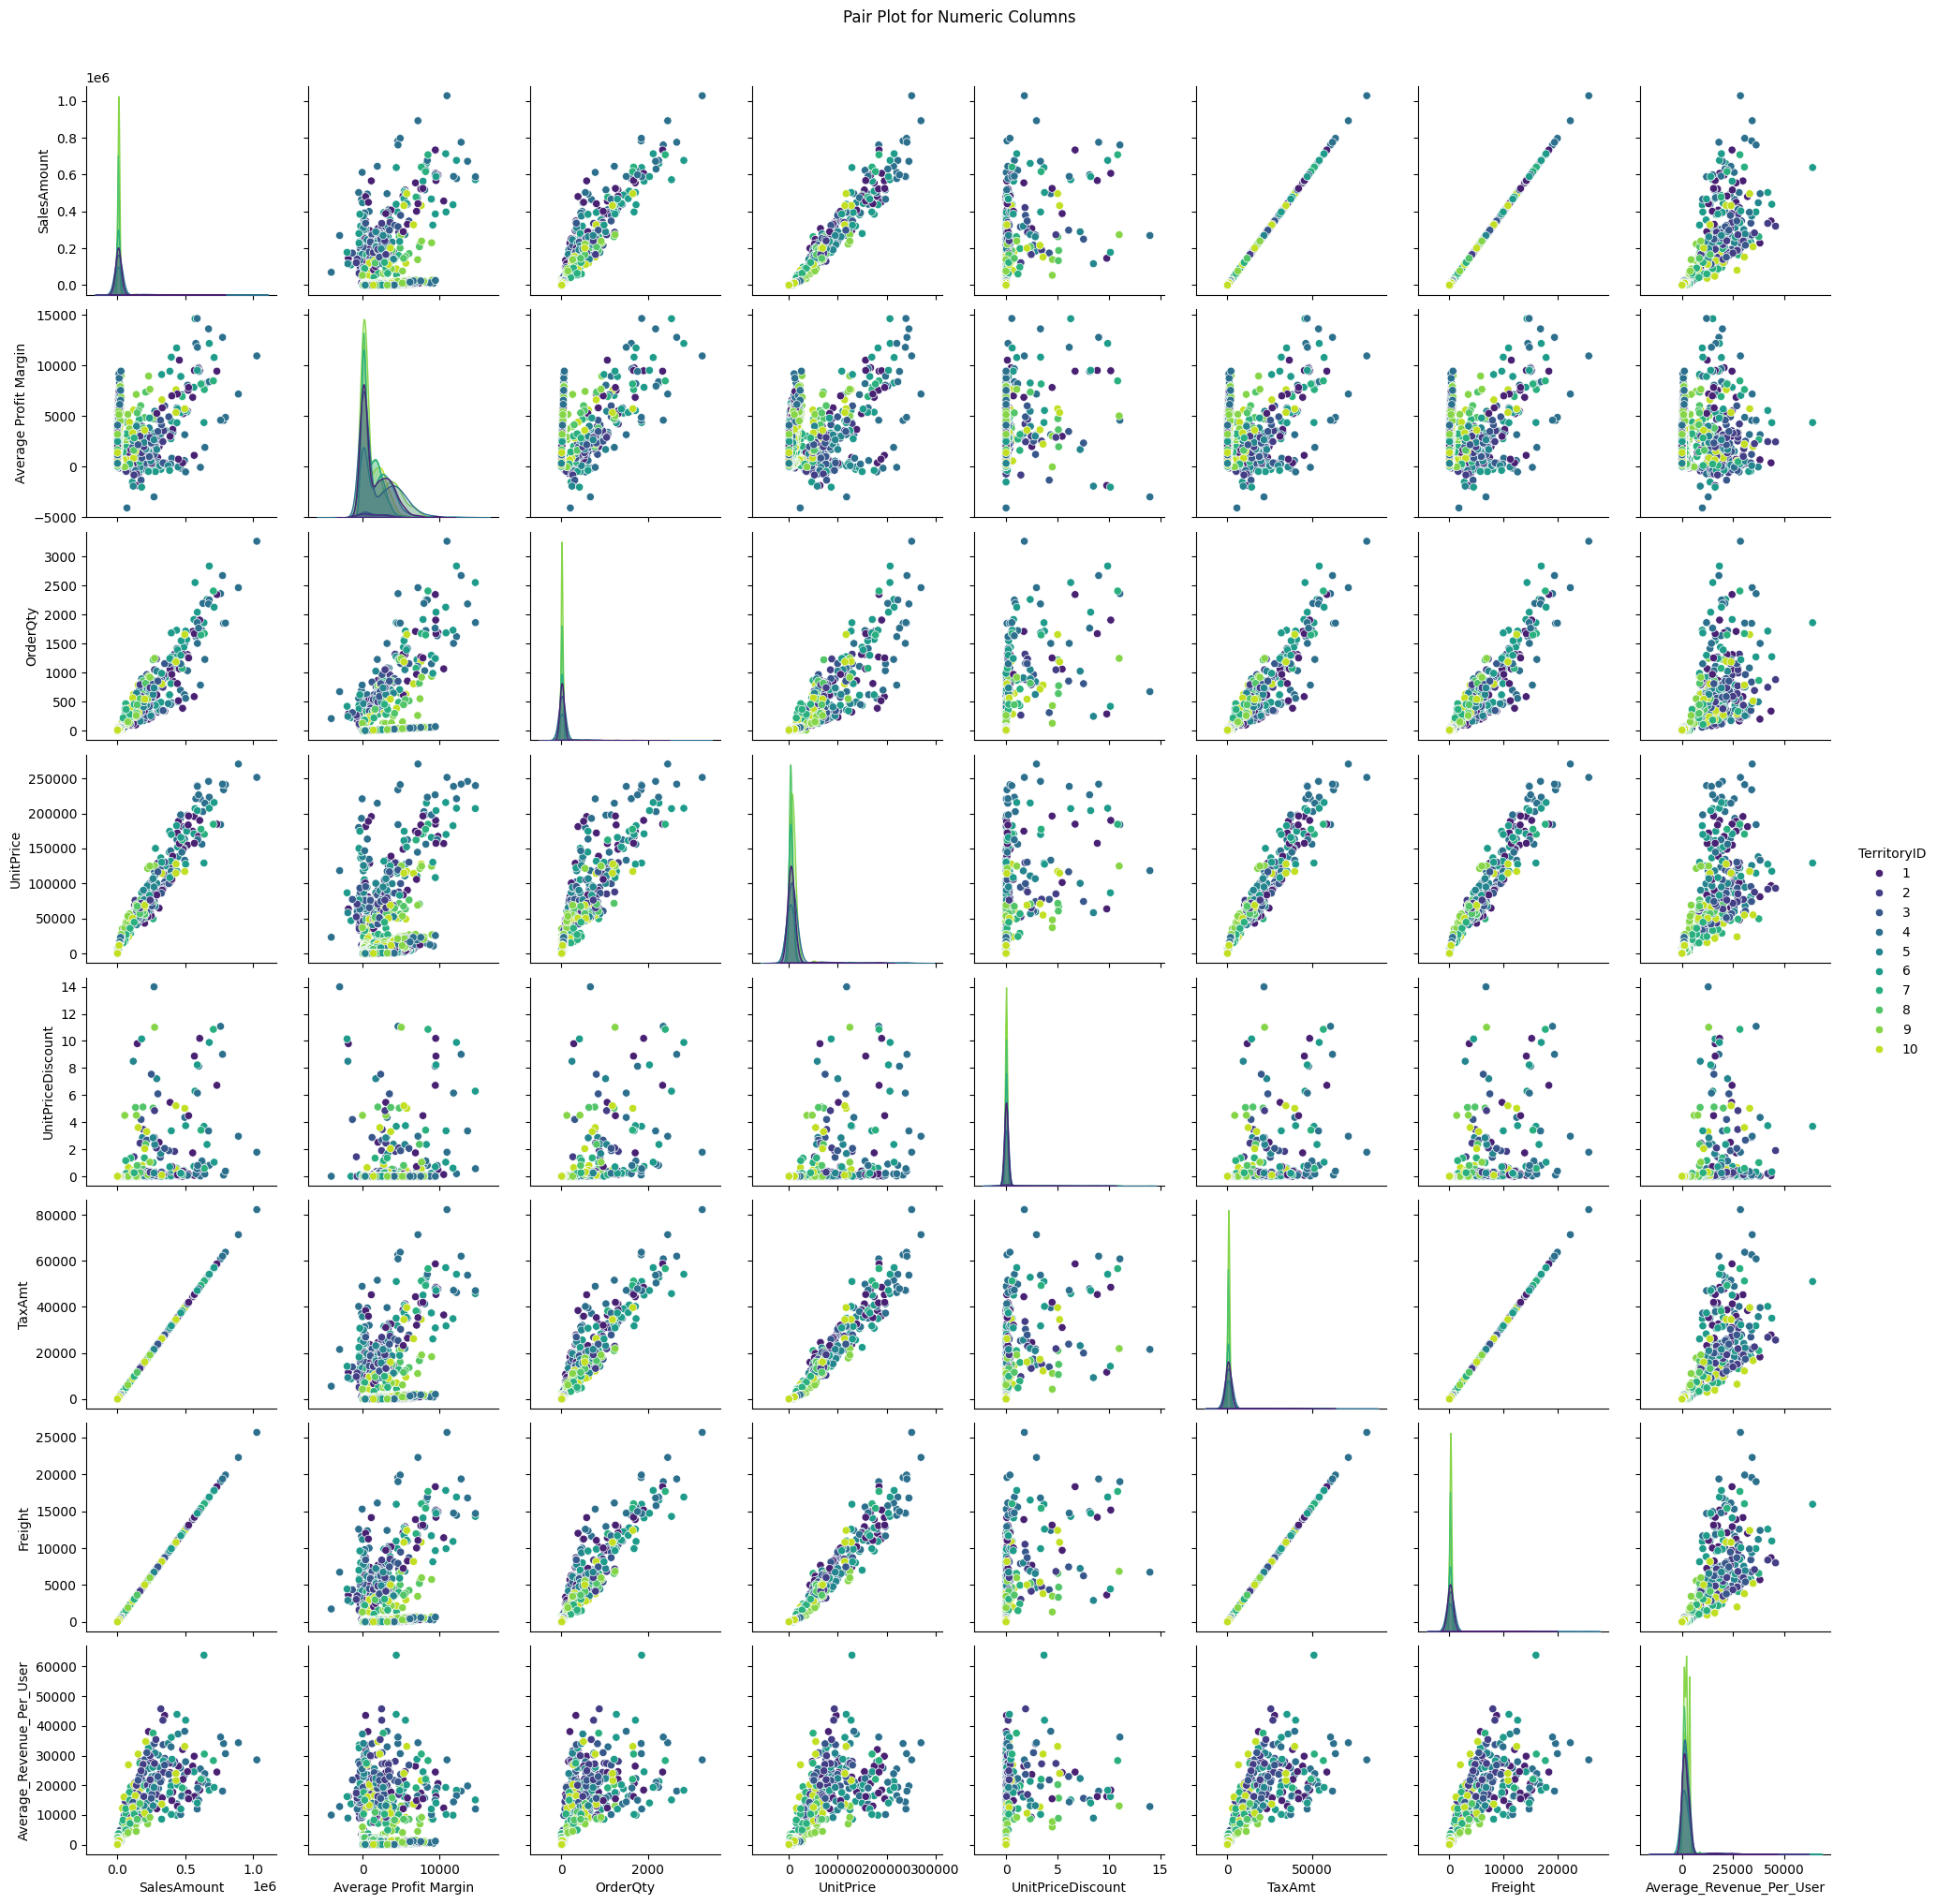

In [74]:
# Pair plots for numeric columns
sns.pairplot(df, hue='TerritoryID', palette='viridis')
plt.suptitle("Pair Plot for Numeric Columns", y=1.02)
plt.show()


In [75]:
grouped_data = df.groupby('TerritoryID').agg({
    'SalesAmount': 'sum',
    'Average Profit Margin': 'mean',
    'OrderQty': 'sum'
}).reset_index()
print(grouped_data)


  TerritoryID   SalesAmount  Average Profit Margin  OrderQty
0           1  1.608494e+07            1573.725813   36776.0
1           2  6.931623e+06            1343.498090   19827.0
2           3  7.909009e+06            1430.794573   19493.0
3           4  2.415361e+07            1886.438084   59075.0
4           5  7.865868e+06            1379.744686   18831.0
5           6  1.634666e+07            1924.894059   49381.0
6           7  7.251556e+06            1048.182774   19906.0
7           8  4.915408e+06             984.512576   13143.0
8           9  1.065534e+07            1533.006832   18293.0
9          10  7.670721e+06            1163.803829   20099.0


C:\Users\Khoi Nguyen\AppData\Local\Temp\ipykernel_3292\1420114193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('TerritoryID').agg({


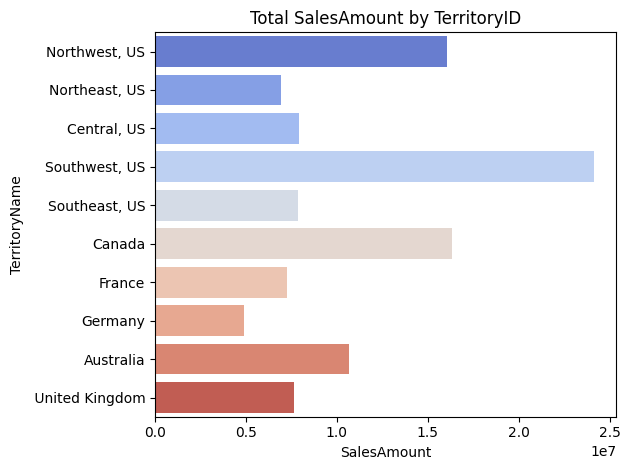

In [76]:
# Bar plot: Total SalesAmount per TerritoryID

grouped_data = df.groupby('TerritoryName', observed=False)['SalesAmount'].sum().reset_index()
sns.barplot(data=grouped_data, y='TerritoryName', x='SalesAmount', hue='TerritoryName', legend=False, palette='coolwarm')
plt.title('Total SalesAmount by TerritoryID')
plt.tight_layout()
plt.show()


In [77]:
df.columns

Index(['TerritoryID', 'TerritoryName', 'SalesAmount', 'Average Profit Margin',
       'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'TaxAmt', 'Freight',
       'Average_Revenue_Per_User'],
      dtype='object')

In [78]:
features = ['SalesAmount', 'Average Profit Margin','Average_Revenue_Per_User']

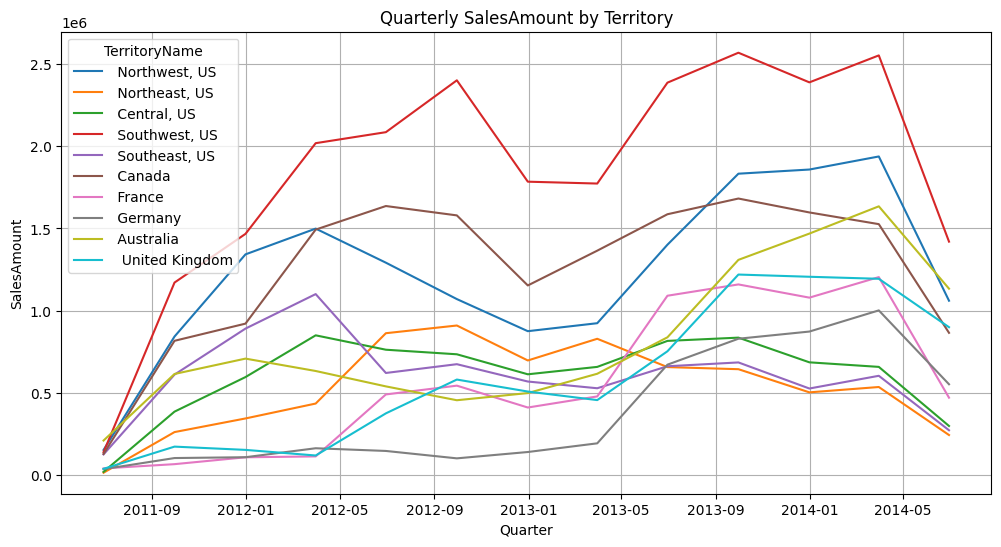

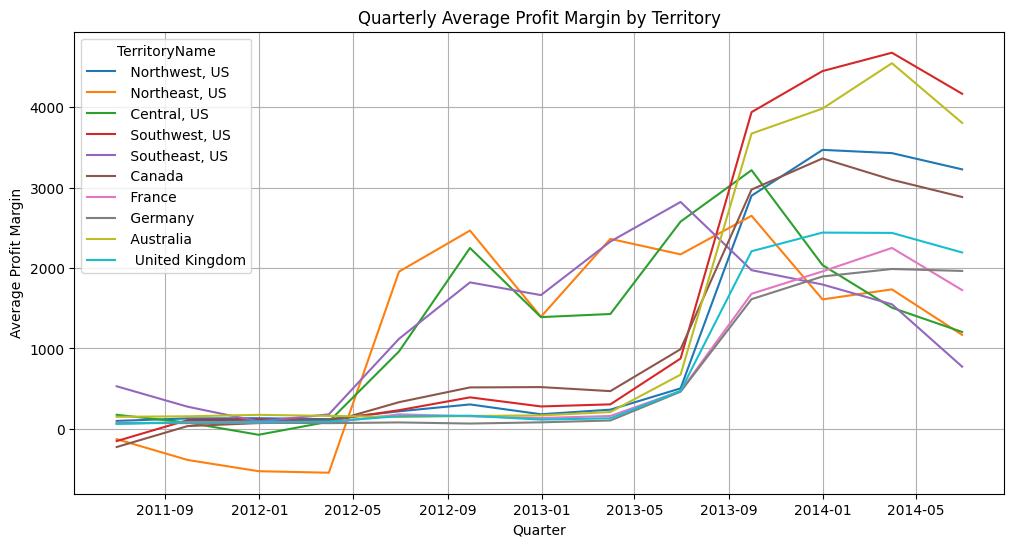

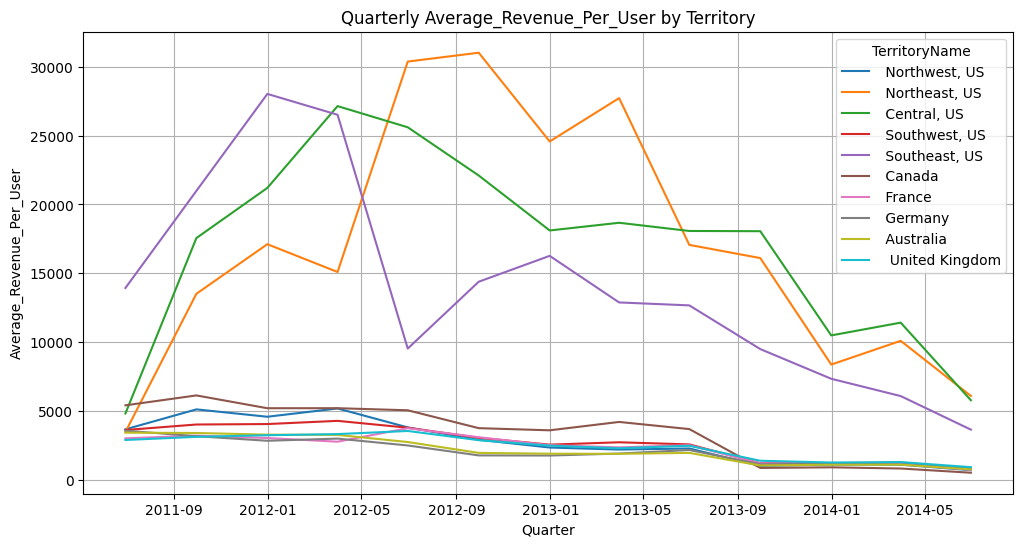

In [79]:
# Resample data to quarterly frequency and aggregate
quarterly_data = (
    df.groupby(['TerritoryName', pd.Grouper(freq='QE')], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'SalesAmount': 'sum',
        'Average Profit Margin': 'mean',
        'Average_Revenue_Per_User': 'mean'
    })
    .reset_index()
)

# Ensure all territories are included and group by both Quarter and TerritoryID
quarterly_data = quarterly_data.groupby(['OrderDate', 'TerritoryName'], observed=True).sum().reset_index()

# Plot the data
for feature in features:
    plt.figure(figsize=(12, 6))
    for territory in quarterly_data['TerritoryName'].unique():
        # Filter data for the current territory
        territory_data = quarterly_data[quarterly_data['TerritoryName'] == territory]
        if not territory_data.empty:  # Ensure there is data to plot
            plt.plot(territory_data['OrderDate'], territory_data[feature], label=f' {territory}')
    
    # Plot details
    plt.title(f'Quarterly {feature} by Territory')
    plt.xlabel('Quarter')
    plt.ylabel(feature)
    plt.legend(title='TerritoryName')
    plt.grid()
    plt.show()

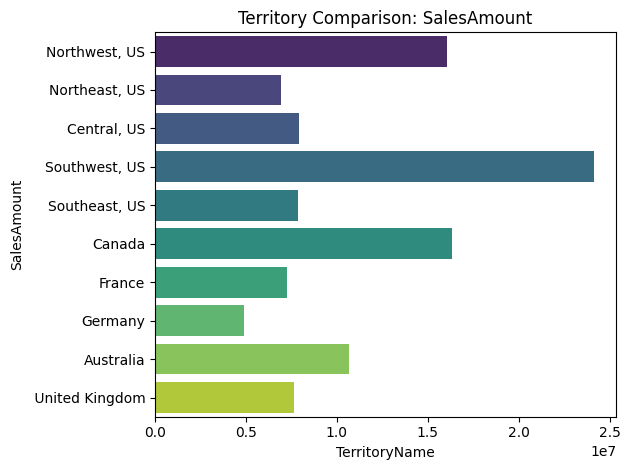

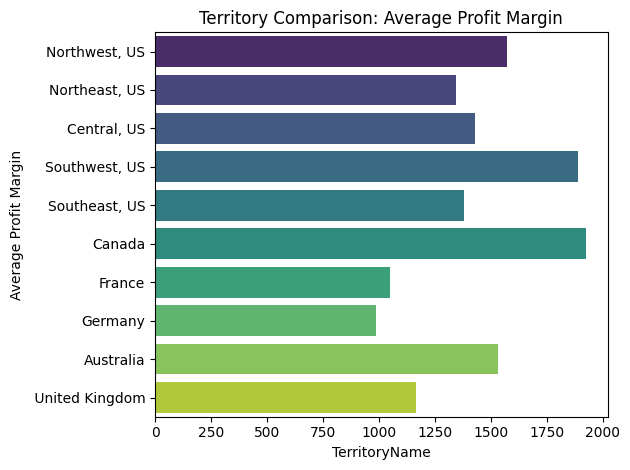

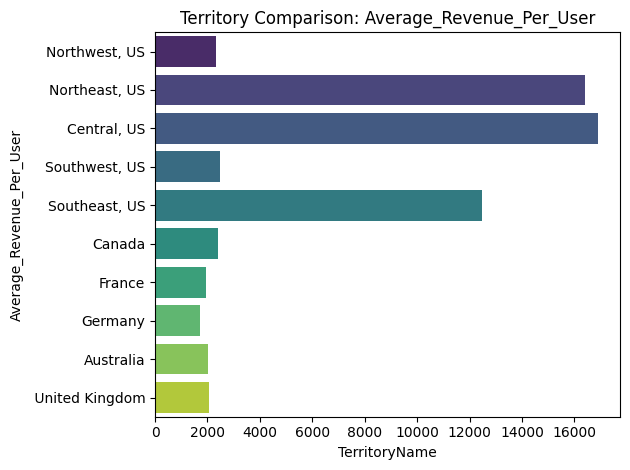

In [80]:
territory_comparison = (
    df.groupby(['TerritoryName'], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'SalesAmount': 'sum',
        'Average Profit Margin': 'mean',
        'Average_Revenue_Per_User': 'mean'
    })
    .reset_index()
)

for feature in features:
    sns.barplot(territory_comparison, y='TerritoryName', x=feature, hue='TerritoryName', legend=False, palette='viridis')
    plt.title(f'Territory Comparison: {feature}')
    plt.xlabel('TerritoryName')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()